In [36]:
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Laboratorium 0

Definiujemy funkcję sawGenerator, która przyjmuje trzy argumenty:
* $n$ - ilość liczb, które chcemy wylosować
* $x_{0}$ - pierwsza wartość ciągu liczb pseudolosowych, wybrana przez użytkownika (seed)
* $z$ - parametr generatora


In [37]:
def saw_generator(n,x0,z):
  rand_numbers = np.array([x0])
  for Xn in range(n):
    rand_numbers=np.append(rand_numbers,np.round(z*rand_numbers[-1],7) - math.floor(np.round(z*rand_numbers[-1],7)))
  return rand_numbers

In [38]:
def calc_period(arr):
    uniq=np.unique(arr)
    count_uniq=np.zeros(len(uniq))
    for count, values in enumerate(uniq):
        count_uniq[count]=np.count_nonzero(arr==values)
    period=0
    if max(count_uniq)>1:
        period=len(arr)/max(count_uniq)

    return np.round(period,1)

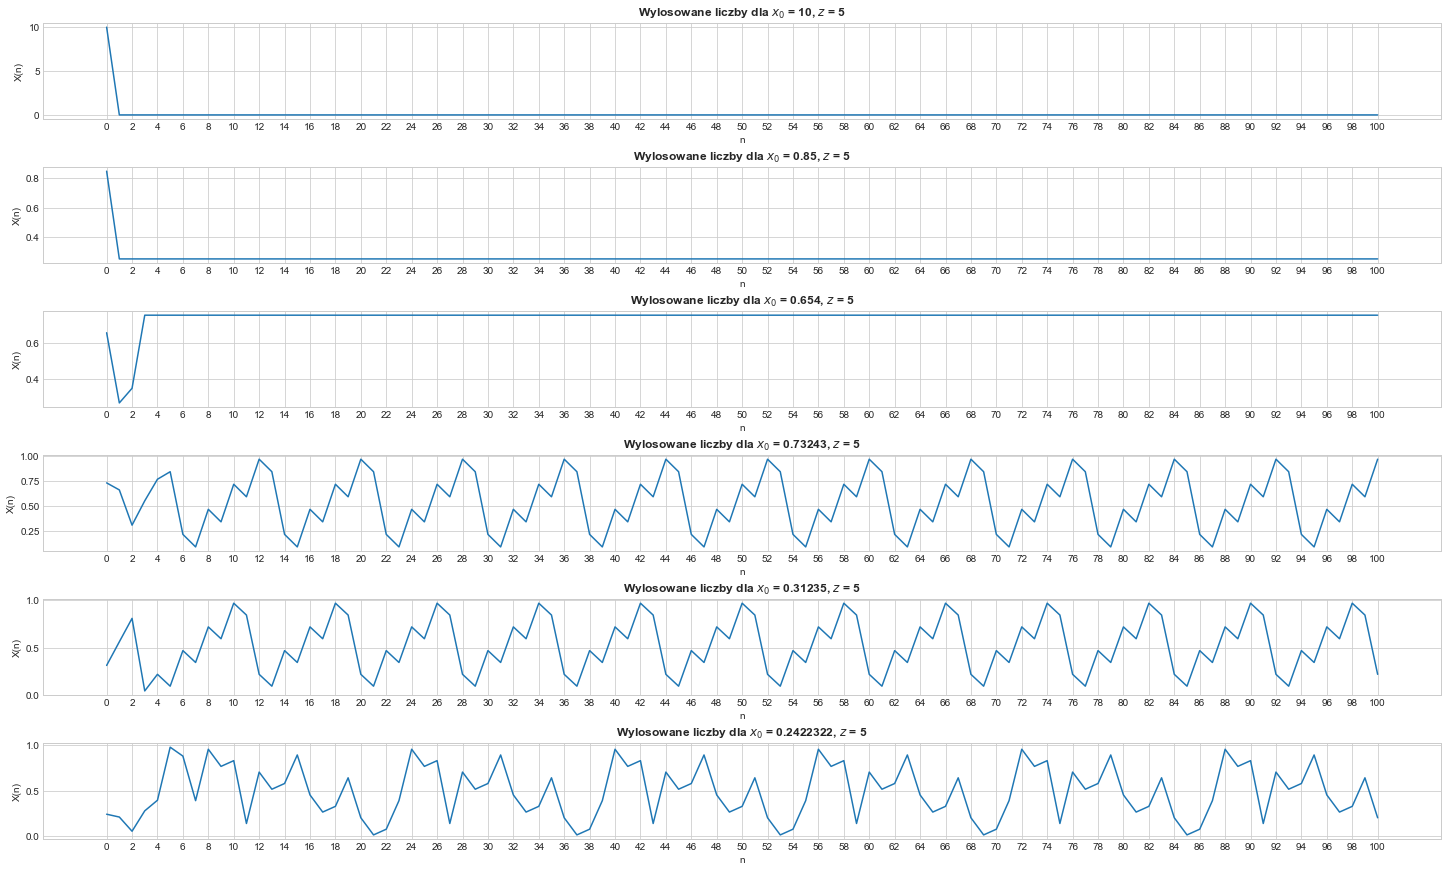

In [39]:
x0 = [10, 0.85, 0.654, 0.73243, 0.31235, 0.2422322]
z = 5
n_plots = 6
n_numbers = 100

fig, axs = plt.subplots(n_plots, figsize=(20, n_plots * 2), constrained_layout=True)

for i in range(n_plots):
    random_list = saw_generator(n_numbers, x0[i]    , z)
    axs[i].plot(random_list)
    axs[i].set_title(f"Wylosowane liczby dla $x_0$ = {x0[i]}, $z$ = {z}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")

plt.show()

Ze względu na naturę generatora piłokształtnego, zależny nam na utrzymywaniu liczb pseudolosowych posiadających część niecałkowitą, ponieważ w przypadku gdy generator "wpadnie" w liczbę całkowitą, będzie cały czas ja utrzymywał. Im bardziej złożona jest część niecałkowita $x_0$ tym bardziej złożony jest kształt piły generatora.

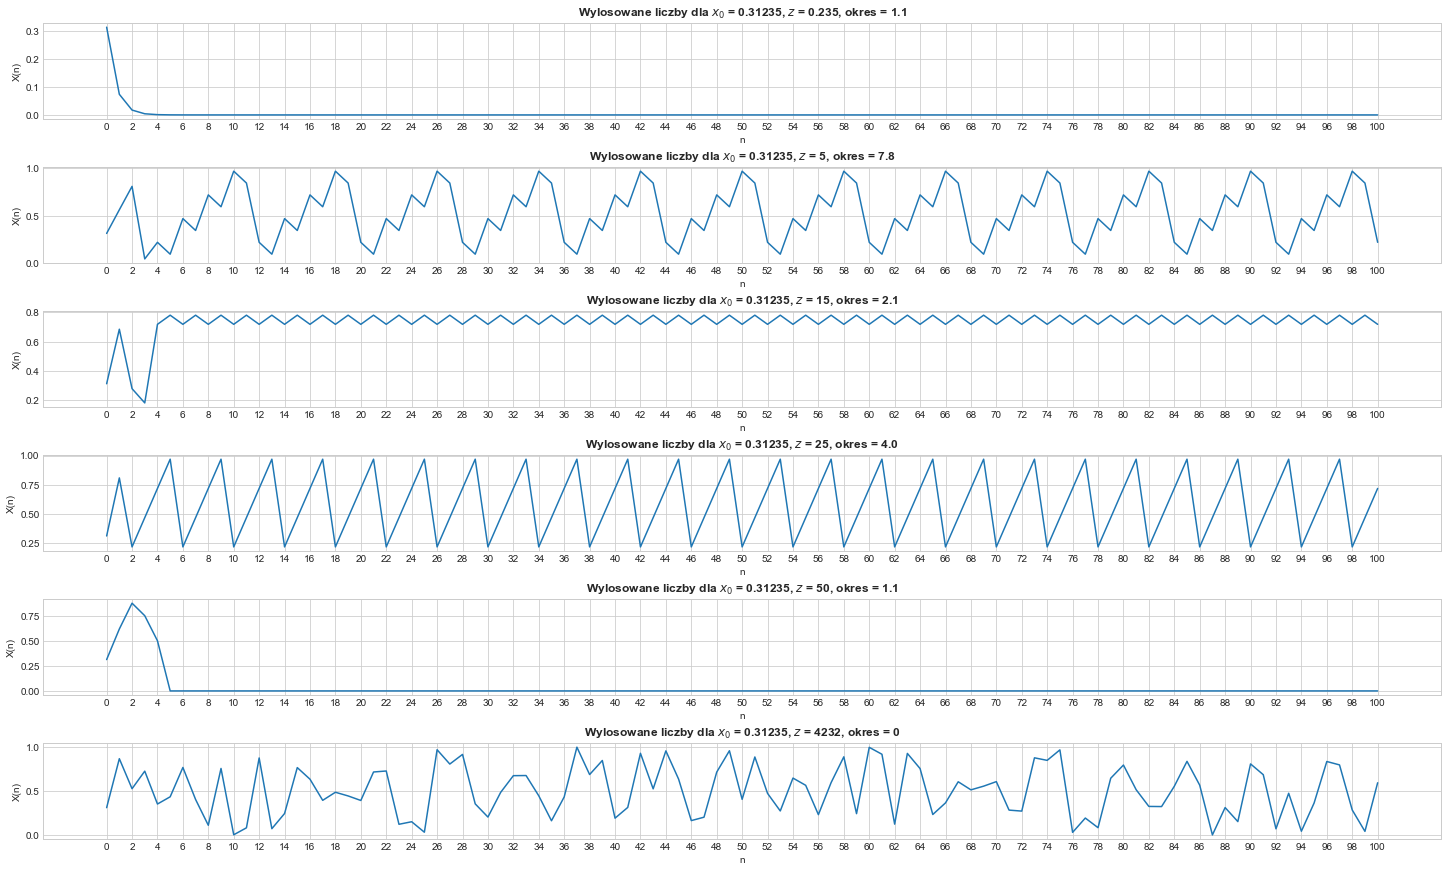

In [40]:
x0 = 0.31235
z = [0.235,5,15,25,50,4232]
n_plots = 6
n_numbers = 100

fig, axs = plt.subplots(n_plots, figsize=(20, n_plots * 2), constrained_layout=True)

for i in range(n_plots):
    random_list = saw_generator(n_numbers, x0    , z[i])
    axs[i].plot(random_list)
    axs[i].set_title(f"Wylosowane liczby dla $x_0$ = {x0}, $z$ = {z[i]}, okres = {calc_period(random_list)}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")

plt.show()

Symulacja została ponowiona przy stałym $x_0$ i zmiennym $z$. Wartość $z$ nie może być mniejsza od 1, ponieważ bardzo szybko liczby pseudolosowe "wpadły" w zero. Zależnie od parametru $z$ zmieniał się okres generatora. Ciężko stwierdzić jak wielkość $z$ wpływała na okres.

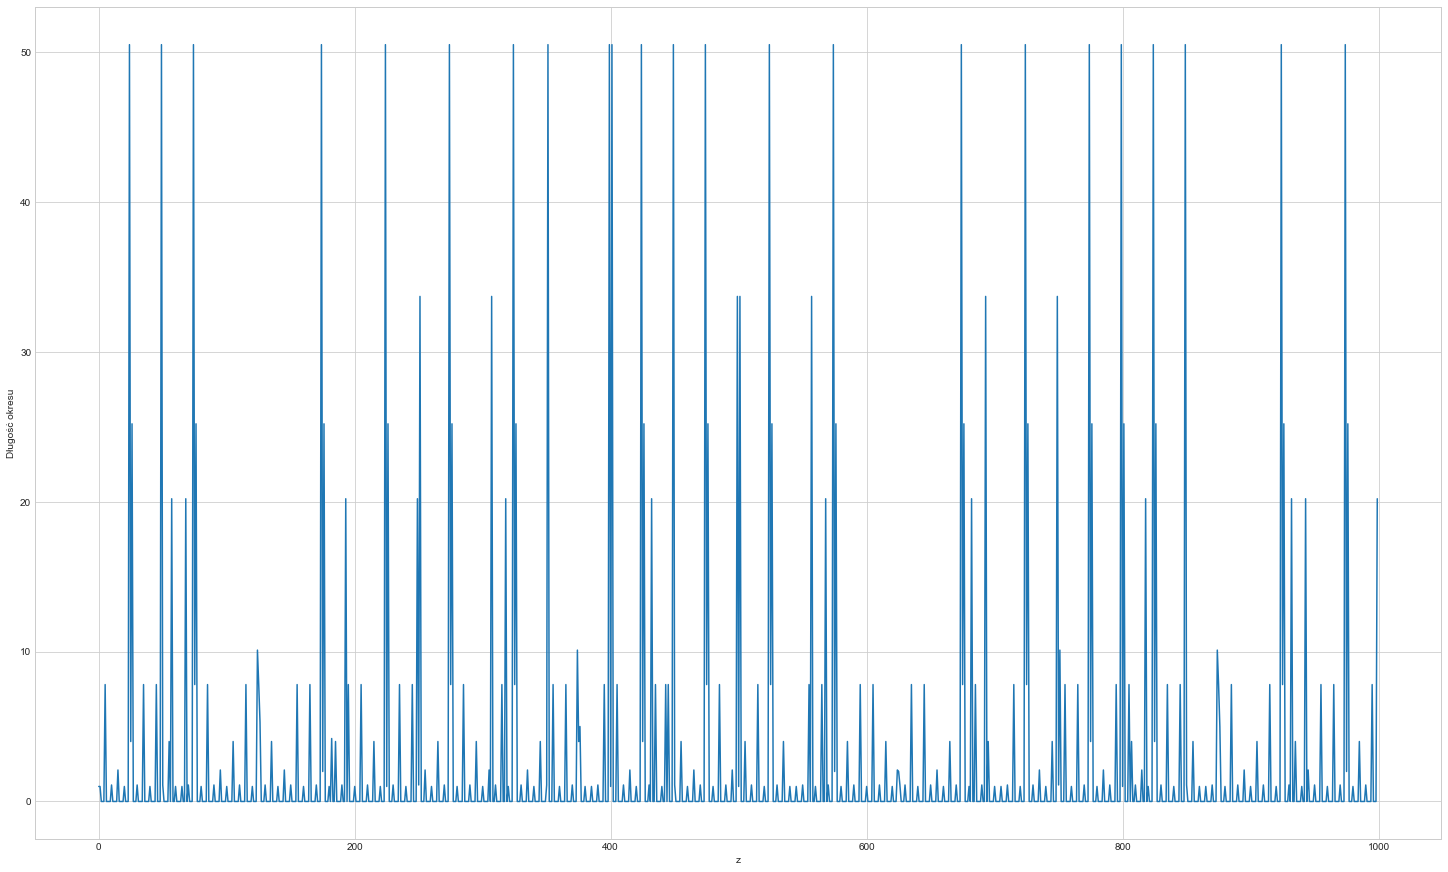

In [41]:


periods_list=np.array([])
for i in range(1000):
    periods_list=np.append(periods_list,calc_period(saw_generator(100, 0.31235,i)))
fig, axs = plt.subplots(1, figsize=(20, 12), constrained_layout=True)
axs.plot(periods_list)
axs.set(xlabel="z", ylabel="Długość okresu")
plt.show()



Wartość okresu generatora, zależnie od parametru $z$ zmieniała się, ale powtarzały się niektóre wartości, jak naprzykład wartość maksymalna czyli 50,5

# Laboratorium 1